In [1]:
import pandas as pd

In [2]:
population = pd.read_excel('Data Eng Interview Challenge - Population.xlsx',
                           sheet_name = 'Dataset',
                           header = 2)

In [3]:
population.head(3)

,Geography,Geography code,Age,Sex,2013,2014,2015,2016
0,Aberdeen City,S12000033,0,All,2529,2560,2518,2533
1,Aberdeen City,S12000033,0,Female,1227,1247,1219,1238
2,Aberdeen City,S12000033,0,Male,1302,1313,1299,1295


In [4]:
population.isnull().any()

Geography         False
Geography code    False
Age               False
Sex               False
2013              False
2014              False
2015              False
2016              False
dtype: bool

In [5]:
population.describe()

,2013,2014,2015,2016
count,120120.000000,120120.000000,120120.000000,120120.000000
mean,6636.276057,6687.961122,6741.755261,6798.140909
std,46218.249761,46527.075036,46868.299221,47215.326790
min,0.000000,2.000000,0.000000,0.000000
25%,580.000000,585.000000,589.000000,594.000000
50%,978.000000,986.000000,995.000000,1003.000000
75%,1879.000000,1893.000000,1905.000000,1921.000000
max,946543.000000,946383.000000,946132.000000,945494.000000


Which geography contained the smallest total population in each year from 2013 to 2016?

In [6]:
population[population.Sex == 'All'].groupby(['Geography']).sum().idxmin()

2013    Isles of Scilly
2014    Isles of Scilly
2015    Isles of Scilly
2016    Isles of Scilly
dtype: object

In this question, the female-to-male ratio is defined as [# of all females in
geography] divided by [# of all males in geography], aggregated across all
age groups. For example, in 2016, Fylde had a total of 39,838 females and
38,152 males, giving a female-to-male ratio of ~1.044.

In [7]:
#data preparation
ratio = (population[population.Sex.isin(['Male', 'Female'])]
         .groupby(['Geography', 'Sex'], as_index = False)
         .sum()
         .pivot(index = 'Geography', columns = 'Sex', values = ['2013', '2016'])
        )

ratio['ratio_2013'] = ratio['2013']['Female'] / ratio['2013']['Male']
ratio['ratio_2016'] = ratio['2016']['Female'] / ratio['2016']['Male']

Which geography had the highest female-to-male ratio in 2013, and what was the ratio?

In [8]:
ratio[ratio.ratio_2013 == ratio.ratio_2013.max()]['ratio_2013']

Geography
Knowsley    1.103591
Name: ratio_2013, dtype: float64

Comparing each geography's female-to-male ratio measurements in 2013 vs 2016, which geography's ratio changed the most?

In [9]:
ratio['max_absolute_change'] = (abs(ratio.ratio_2016 - ratio.ratio_2013) / ratio.ratio_2013)
ratio[ratio.max_absolute_change == ratio.max_absolute_change.max()]

2013          2016        ratio_2013 ratio_2016  \
Sex       Female   Male Female   Male                         
Geography                                                     
Moray      44052  40658  48417  47653   1.083477   1.016033   

          max_absolute_change  
Sex                            
Geography                      
Moray                0.062248

Which changed the least?

In [10]:
ratio[ratio.max_absolute_change == ratio.max_absolute_change.min()]

2013          2016        ratio_2013 ratio_2016  \
Sex        Female   Male Female   Male                         
Geography                                                      
Winchester  60934  57330  62840  59125   1.062864   1.062833   

           max_absolute_change  
Sex                             
Geography                       
Winchester            0.000029

This question relates to the age distribution of the total UK population.

Plot a visualisation of the 2016 age distribution, split out by sex.

What anomalies do you see? Describe possible factors that could account for each observed anomaly.

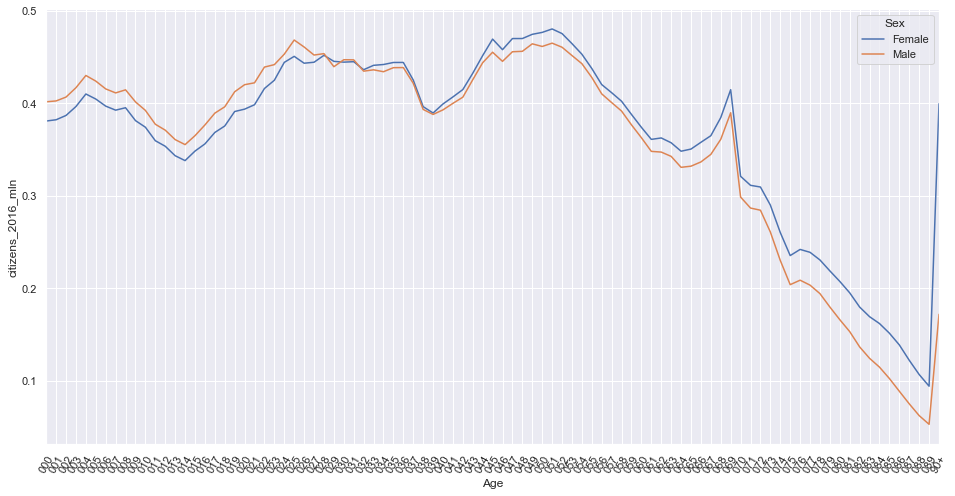

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

uk = (population[(population.Geography == 'United Kingdom') & (population.Sex != 'All')]
      .drop(columns = ['Geography code', '2013', '2014', '2015'])
     )
uk['Age'] = uk.Age.str.zfill(3)
uk['citizens_2016_mln'] = uk['2016']/1000000
uk = uk.sort_values(by = 'Age')

sns.set(rc={'figure.figsize':(16,8)})
sns.lineplot(data=uk, x='Age', y = 'citizens_2016_mln', hue = 'Sex')
plt.xticks(rotation=60)
plt.margins(x=0)
plt.show()

The UK's population is getting older over time, but according to this
dataset that is not the case everywhere across the UK.

Investigate which geographies have a particularly high or low proportion of over65s, and which show the largest change in proportion of over-65s between 2013 and 2016.

Are your numerical results realistic? What factors could explain the outliers?

In [12]:
ratio = population[population.Sex == 'All'][:]
ratio['Age'] = ratio.Age.str.zfill(3)

ratio.loc[ratio['Age'] < '065', 'category'] = 'under_65'
ratio.loc[ratio['Age'] >= '065', 'category'] = 'over_65'

ratio = (ratio
         .groupby(['Geography', 'category'], as_index = False)
         .sum()
         .pivot(index = 'Geography', columns = 'category', values = ['2013', '2016'])
        )

ratio['over_65_prop_2013'] = ratio['2013']['over_65'] / (ratio['2013']['over_65'] + ratio['2013']['under_65'])
ratio['over_65_prop_2016'] = ratio['2016']['over_65'] / (ratio['2016']['over_65'] + ratio['2016']['under_65'])

ratio[ratio.over_65_prop_2016.isin([ratio.over_65_prop_2016.max(), ratio.over_65_prop_2016.min()])]['over_65_prop_2016']

Geography
Tower Hamlets    0.059917
West Somerset    0.333178
Name: over_65_prop_2016, dtype: float64

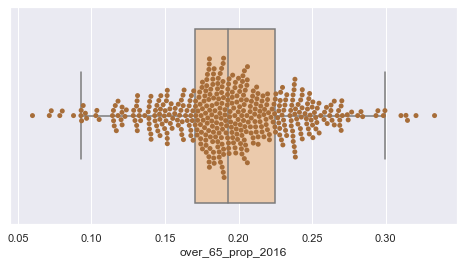

In [13]:
sns.set(rc={'figure.figsize':(8, 4)})
sns.boxplot(x = 'over_65_prop_2016', data = ratio, orient = 'h', showfliers = False, color = '#F6C9A1')
sns.swarmplot(x = 'over_65_prop_2016', data = ratio, color = '#A76D39')

In [14]:
ratio['max_absolute_change'] = (abs(ratio.over_65_prop_2016 - ratio.over_65_prop_2013) / ratio.over_65_prop_2013)
ratio[ratio.max_absolute_change == ratio.max_absolute_change.max()]

2013             2016          over_65_prop_2013  \
category  over_65 under_65 over_65 under_65                     
Geography                                                       
Highland    83197   513323   50076   184694          0.139471   

          over_65_prop_2016 max_absolute_change  
category                                         
Geography                                        
Highland           0.213298            0.529341